# Assignment 6: Neural Networks

Vignesh Madharapakkam Pagadala

In [52]:
# Neural networks
import neuralnetworks as nn
import matplotlib.pyplot as plt
import numpy as np
import scaledconjugategradient as scg
import mlutils as ml
import time
import pprint
from numpy import genfromtxt
import pandas as pd

def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify = False):
	# Master result list - we shall keep appending to this.
	result = []
	# Iterate through each network structure provided.
	for net in hiddenLayerStructures:
		# To store performances of each training run for a network structure.
		trainPerformance = []
		testPerformance = []

		# To measure time elapsed.
		start_time = time.time()
		# Iterate for number of repetitions to train neural network.
		for i in range(numberRepetitions):
			# Now, we have to partition X and T, into training and testing data.
			Xtrain,Ttrain,Xtest,Ttest = ml.partition(X, T, (trainFraction, 1 - trainFraction), classification = classify)

			# Create a neural network for this structure.
			nnet = nn.NeuralNetwork(Xtrain.shape[1],net,Ttrain.shape[1])
			# Commence training
			nnet.train(Xtrain, Ttrain, nIterations = numberIterations)
			# Use the trained network to produce outputs (for both training and testing input datasets).
			trainOut = nnet.use(Xtrain)
			testOut = nnet.use(Xtest)
			trainRSME = 0
			testRSME = 0
			# If classifying, calculate samples classified incorrectly (for both training and testing datasets).
			if classify == True:
				# Calculate number of samples classified incorrectly.
				# For training set.
				trainRSME = (len(trainOut) - np.sum(trainOut == Ttrain)) / len(trainOut)
				# For test set.
				testRSME = (len(testOut) - np.sum(testOut == Ttest)) / len(testOut)

			else:
				# Calculate error in training set.
				trainError = trainOut - Ttrain
				trainRMSE = np.sqrt(np.mean((trainError**2)))
				# Calculate error in testing set
				testError = testOut - Ttest
				testRMSE = np.sqrt(np.mean((testError**2)))

			# Append train and test performances to list.
			trainPerformance.append(trainRMSE)
			testPerformance.append(testRMSE)
		end_time = time.time()
		elapsed = end_time - start_time
		# Now, we append everything to the master 'result' list.
		result.append([net, trainPerformance, testPerformance, elapsed])

	return result

def summarize(results):
	newres = []
	for i in results:
		net = i[0]
		trainPerformance = i[1]
		testPerformance = i[2]
		elapsed = i[3]
		trainMean = sum(trainPerformance) / len(trainPerformance)
		testMean = sum(testPerformance) / len(trainPerformance)
		newres.append([net, trainMean, testMean, elapsed])
	return newres

def bestNetwork(summary):
	bestVal = summary[0]
	for el in summary:
		if el[2] < bestVal[2]:
			bestVal = el
	return bestVal

## Examples


In [2]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

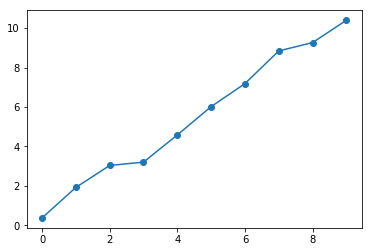

In [4]:
plt.plot(X, T, 'o-');

In [5]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.40536577,  0.21523598,  0.14133484,  0.11538668,
        0.09189181,  0.08295157,  0.07936842,  0.07791015,  0.07487245,
        0.07200469,  0.07146735,  0.07070515,  0.07013958,  0.06999591,
        0.06978245,  0.0690478 ,  0.06806027,  0.0676652 ,  0.06740885,
        0.0670682 ,  0.06678974,  0.06677703,  0.06629686,  0.06623396,
        0.066169  ,  0.06602729,  0.0657997 ,  0.06578852,  0.06578351,
        0.06570652,  0.06568527,  0.06568527,  0.06568527,  0.06568527,
        0.06568527,  0.06568527,  0.06568527,  0.06568527,  0.06568527,
        0.06568527,  0.06568527,  0.06568527,  0.06568527,  0.06568527,
        0.06568527,  0.06568527,  0.06568527,  0.06568527,  0.06568527,
        0.06568527,  0.06568527,  0.06568527,  0.06490479,  0.06393036,
        0.06358026,  0.0634574 ,  0.0634275 ,  0.06298268,  0.06254124,
        0.06229649,  0.06215892,  0.0620826 ,  0.06206153,  0.06204373,
        0.06191908,  0.06142396,  0.06142274,  0.06105205,  0.06

In [6]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.43966673,  0.43966673,  0.43966673,  0.23992882,
        0.13635833,  0.09096788,  0.09023429,  0.08467754,  0.07519409,
        0.07378244,  0.07318642,  0.07310171,  0.07295591,  0.07289168,
        0.07267777,  0.07223946,  0.07204272,  0.07172354,  0.07168917,
        0.07149746,  0.07149746,  0.07149746,  0.07149746,  0.07149746,
        0.07149746,  0.07149746,  0.07149746,  0.07132504,  0.07036829,
        0.06972102,  0.06876788,  0.0679309 ,  0.06714482,  0.06714058,
        0.06712173,  0.06711115,  0.06709111,  0.06706302,  0.06705373,
        0.06703309,  0.06702749,  0.06692814,  0.0669008 ,  0.06671738,
        0.06670466,  0.06658654,  0.06651776,  0.0658077 ,  0.06571455,
        0.06553309,  0.06552721,  0.06550007,  0.06546558,  0.06529163,
        0.0652895 ,  0.06528205,  0.06527733,  0.06527565,  0.06527042,
        0.06526975,  0.06526628,  0.06526443,  0.06526314,  0.06525958,
        0.06525898,  0.06525551,  0.06525314,  0.0652496 ,  0.06

In [7]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results

[[2,
  [0.25200717810662471,
   0.26381872224181679,
   0.22789929115096724,
   0.32404511703882638,
   0.12851658059089391],
  [0.43168139506892972,
   0.50675036105631566,
   0.49074001261956968,
   0.23147285280594387,
   0.80506380443209724],
  0.3443930149078369],
 [10,
  [0.16328190970717307,
   0.15632100566430374,
   0.16130310678450757,
   0.11821092587316939,
   0.18778121635048356],
  [0.67132116554539523,
   0.50495205681314881,
   0.36425934896790996,
   0.70630535904420089,
   0.31408528255775614],
  0.40033388137817383],
 [[10, 10],
  [0.16857388328388481,
   0.18980219825713068,
   0.15985736756145533,
   0.18852395612125877,
   0.18154597606870243],
  [0.45883990963770238,
   0.28341646348060284,
   0.36070736245698604,
   0.38012052327370893,
   0.528291743217293],
  0.5563693046569824]]

In [12]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)

In [13]:
summarize(results)

[[0, 0.31319143622607037, 0.37816379249766224, 0.011005401611328125],
 [1, 0.24898574232802587, 0.62368816540935179, 0.2526829242706299],
 [2, 0.23153789543954345, 0.54011580791093072, 0.33172059059143066],
 [10, 0.17043291222335927, 0.47478038384946564, 0.364072322845459],
 [[10, 10], 0.18300704300485099, 0.42940242031800657, 0.5174143314361572],
 [[5, 5, 5, 5], 0.21059472187875086, 0.61724393238622177, 0.7283289432525635],
 [[2, 2, 2, 2, 2],
  0.26987479762869082,
  0.51589660009202842,
  0.759429931640625]]

In [14]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))

[0, 0.31604563150169657, 0.37370697740756226, 0.07756161689758301]
Hidden Layers 0 Average RMSE Training 0.32 Testing 0.37 Took 0.08 seconds


## Data for Regression Experiment

In [20]:
# Load data from CSV file.
df=pd.read_csv('energydata_complete.csv', sep=',',header=None)
# Delete the first column (date time) and last two columns.
df = df.drop(df.columns[[0, -2, -1]], axis=1)
# Get names of input data. Get it in a list.
Xnames = []
Xn = df.iloc[0, 2:]
for i in Xn:
    Xnames.append(i)
# Get names of target data into a list.
Tnames = []
Tn = df.iloc[0, :2]
for i in Tn:
    Tnames.append(i)

# Get target data.
Td = df.iloc[1:, [0,1]]
Td = Td.as_matrix()
Tenergy = Td.astype(float)

# Get input data.
Xd = df.iloc[1:, 2:]
Xd = Xd.as_matrix()
Xenergy = Xd.astype(float)

In [21]:
results = trainNNs(Xenergy, Tenergy, 0.8, [5], 1, 10)
print(summarize(results))

SCG: Iteration 1 ObjectiveF=0.48964 Scale=1.000e-06 Time=0.00674 s/iter
SCG: Iteration 2 ObjectiveF=0.48964 Scale=5.000e-07 Time=0.00838 s/iter
SCG: Iteration 3 ObjectiveF=0.48964 Scale=2.000e-06 Time=0.00245 s/iter
SCG: Iteration 4 ObjectiveF=0.48964 Scale=8.000e-06 Time=0.00245 s/iter
SCG: Iteration 5 ObjectiveF=0.48964 Scale=3.200e-05 Time=0.00255 s/iter
SCG: Iteration 6 ObjectiveF=0.48964 Scale=1.280e-04 Time=0.00245 s/iter
SCG: Iteration 7 ObjectiveF=0.48964 Scale=5.120e-04 Time=0.00250 s/iter
SCG: Iteration 8 ObjectiveF=0.48964 Scale=2.048e-03 Time=0.00251 s/iter
SCG: Iteration 9 ObjectiveF=0.48964 Scale=8.192e-03 Time=0.00276 s/iter
SCG: Iteration 10 ObjectiveF=0.48964 Scale=3.277e-02 Time=0.00245 s/iter
[[5, 72.99184559738579, 68.803739175608484, 0.5659322738647461]]


In [22]:
Tnames

['Appliances', 'lights']

In [23]:
Xnames

['T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [24]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

Train several neural networks on all of this data for 100 iterations.  Plot the error trace (nnet.getErrorTrace()) to help you decide now many iterations might be needed.  100 may not be enough.  If for your larger networks the error is still decreasing after 100 iterations you should train all nets for more than 100 iterations.

Now use your `trainNNs`, `summarize`, and `bestNetwork` functions on this data to investigate various network sizes.

In [18]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, [5, 5], [10, 10]], 10, 100)

In [19]:
summarize(results)

[[0, 67.046960179422285, 67.644136371408763, 0.998682975769043],
 [5, 65.301632625880842, 66.328853488839485, 13.130361795425415],
 [[5, 5], 64.277382425810785, 66.416365860755761, 19.365249395370483],
 [[10, 10], 62.741905999268582, 64.979550044221469, 33.62221097946167]]

In [25]:
bestNetwork(summarize(results))

[5, 72.99184559738579, 68.803739175608484, 0.5659322738647461]

## Training of several nets and plotting err trace

### Network 1

In [36]:
net1 = nn.NeuralNetwork(Xenergy.shape[1],[5],Tenergy.shape[1])
net1.train(Xenergy, Tenergy, 100)
err = net1.getErrorTrace()

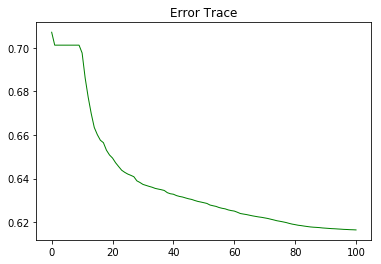

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(err, linewidth = 1, color = 'g')
ax.set(title = 'Error Trace')
plt.show()

### Network 2

In [38]:
net2 = nn.NeuralNetwork(Xenergy.shape[1],[5, 5],Tenergy.shape[1])
net2.train(Xenergy, Tenergy, 100)
err2 = net2.getErrorTrace()

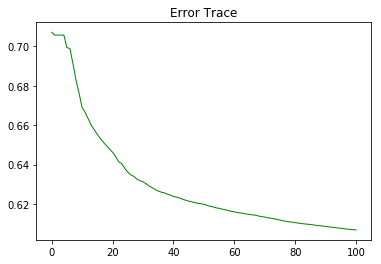

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(err2, linewidth = 1, color = 'g')
ax.set(title = 'Error Trace')
plt.show()

Seems, like the error is still decreasing. Let's increase the number of iterations.

In [49]:
net21 = nn.NeuralNetwork(Xenergy.shape[1],[5, 5],Tenergy.shape[1])
net21.train(Xenergy, Tenergy, 500)
err21 = net21.getErrorTrace()

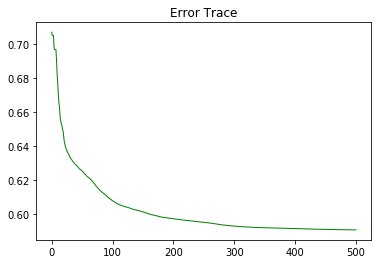

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(err21, linewidth = 1, color = 'g')
ax.set(title = 'Error Trace')
plt.show()

### Network 3

In [39]:
net3 = nn.NeuralNetwork(Xenergy.shape[1],[3,2,3],Tenergy.shape[1])
net3.train(Xenergy, Tenergy, 100)
err3 = net3.getErrorTrace()

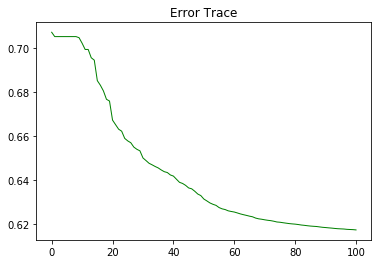

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(err3, linewidth = 1, color = 'g')
ax.set(title = 'Error Trace')
plt.show()

### Network 4

In [42]:
net4 = nn.NeuralNetwork(Xenergy.shape[1],[10,10],Tenergy.shape[1])
net4.train(Xenergy, Tenergy, 100)
err4 = net4.getErrorTrace()

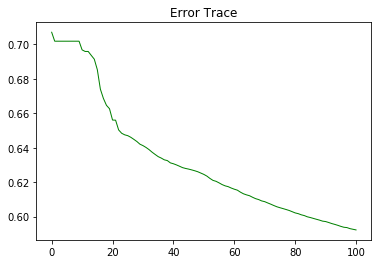

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(err4, linewidth = 1, color = 'g')
ax.set(title = 'Error Trace')
plt.show()

Quite evident that the error can be decreased further. More iterations!

In [50]:
net41 = nn.NeuralNetwork(Xenergy.shape[1],[10,10],Tenergy.shape[1])
net41.train(Xenergy, Tenergy, 500)
err41 = net41.getErrorTrace()

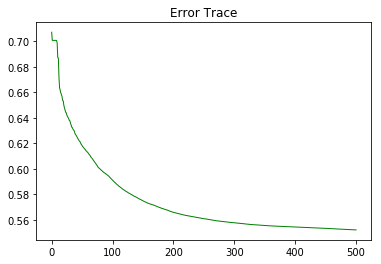

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(err41, linewidth = 1, color = 'g')
ax.set(title = 'Error Trace')
plt.show()

### Network 5

In [47]:
net5 = nn.NeuralNetwork(Xenergy.shape[1],[0],Tenergy.shape[1])
net5.train(Xenergy, Tenergy, 100)
err5 = net5.getErrorTrace()

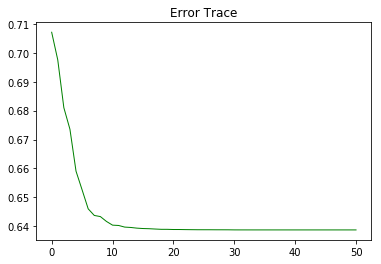

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(err5, linewidth = 1, color = 'g')
ax.set(title = 'Error Trace')
plt.show()

## Now let's try 10 different hidden layer structures.

In [55]:
res = trainNNs(Xenergy, Tenergy, 0.8, [0, 1, 3, [3,4], 2, [1,2,1], [5,5], 5, [10, 10], [2,2]], 5, 100)

In [57]:
summ = summarize(res)
summ

[[0, 67.482693586391889, 65.896217129081293, 3.8897058963775635],
 [1, 70.108307451986818, 71.933279022735007, 23.86779260635376],
 [3, 65.850456075111396, 66.721363148812927, 40.16896986961365],
 [[3, 4], 65.842057975193086, 65.116333782971651, 63.80573081970215],
 [2, 66.27739793854262, 66.733975354089154, 33.07516002655029],
 [[1, 2, 1], 69.736915881322474, 67.559449069152947, 38.11185550689697],
 [[5, 5], 64.746682814536683, 65.185772632971009, 92.60521125793457],
 [5, 65.599829787736198, 65.57678991784347, 57.98296308517456],
 [[10, 10], 63.032106718659819, 65.483787175952884, 163.1770739555359],
 [[2, 2], 66.378964681925623, 66.283873384587679, 44.56074285507202]]

In [58]:
best = bestNetwork(summ)
best

[[3, 4], 65.842057975193086, 65.116333782971651, 63.80573081970215]

Test at least 10 different hidden layer structures.  Larger numbers of layers and units may do the best on training data, but not on testing data. Why?

Now train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date).  As before use `ml.partition` to produce the training and testing sets.

For the testing data, plot the predicted and actual `Appliances` energy use, and the predicted and actual `lights` energy use, in two separate plots.  Discuss what you see.

In [59]:
XEnergyTrain,TEnergyTrain,XEnergyTest,TEnergyTest = ml.partition(Xenergy, Tenergy, (0.8, 0.2), classification = False)

In [61]:
nnetn = nn.NeuralNetwork(XEnergyTrain.shape[1],best[0],TEnergyTrain.shape[1])

In [62]:
nnetn.train(XEnergyTrain, TEnergyTrain, 100)

NeuralNetwork(24, [3, 4], 2)
   Network was trained for 101 iterations. Final error is 0.61675256646235.

In [ ]:
XEnergyTestOut = nnetn

## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     
Read the data in the file `Frogs_MFCCs.csv` into python.  This will be a little tricky. Each line of the file is a sample of audio features plus three columns that label the sample by family, genus, and species. We will try to predict the species.  The tricky part is that the species is given as text.  We need to convert this to a target class, as an integer. The `numpy` function `unique` will come in handy here.

In [21]:
Xanuran.shape, Tanuran.shape

((7195, 21), (7195, 1))

In [22]:
Xanuran[:2,:]

array([[ 0.1529363 , -0.1055859 ,  0.20072191,  0.31720106,  0.26076385,
         0.10094464, -0.1500626 , -0.17112763,  0.12467644,  0.18865415,
        -0.07562172, -0.15643593,  0.08224512,  0.13575204, -0.02401665,
        -0.10835111, -0.07762252, -0.0095678 ,  0.05768398,  0.11868014,
         0.01403845],
       [ 0.17153426, -0.09897474,  0.26842522,  0.33867186,  0.2683531 ,
         0.06083509, -0.22247464, -0.20769267,  0.17088287,  0.27095828,
        -0.09500394, -0.25434147,  0.02278623,  0.1633201 ,  0.01202228,
        -0.09097401, -0.05650952, -0.03530336,  0.02013996,  0.08226299,
         0.02905574]])

In [23]:
Tanuran[:2]

array([[0],
       [0]])

In [24]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

672 samples in class 0
3478 samples in class 1
542 samples in class 2
310 samples in class 3
472 samples in class 4
1121 samples in class 5
270 samples in class 6
114 samples in class 7
68 samples in class 8
148 samples in class 9


In [25]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, [5, 5]], 5, 100, classify=True)

In [26]:
summarize(results)

[[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131],
 [5, 0.035267546907574707, 0.041000694927032663, 5.346082448959351],
 [[5, 5], 0.046699096594857534, 0.057956914523974987, 6.503756046295166]]

In [27]:
bestNetwork(summarize(results))

[0, 0.028179291174426684, 0.034885337039610845, 2.706338405609131]

Now do an investigation like you did for the regression data. 

Test at least 10 different hidden layer structures. Then train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date). 

Plot the predicted and actual `Species` for the testing data as an integer.  Discuss what you see.

## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [15]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])

--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.3, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))

--- 20/20 points. You correctly found that network [20, 20] is best.

C:\Users\Vignesh\Documents\Colorado State University\Courses\CS440 - Introduction to Artificial Intelligence - Chuck Anderson\Assignments Execution Grade is 60/60

======================= The regression data set =======================

--- _/5 points. Read

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A6.ipynb```.  So, for me it would be ```Anderson-A3.ipynb```.  Submit the file using the ```Assignment 3``` link on [Canvas](https://colostate.instructure.com/courses/41327).

## Extra Credit

  2. Repeat the above regression and classification experiments with a second regression data set and a second classification data set.
  
  2. Since you are collecting the performance of all repetitions for each network structure, you can calculate a confidence interval about the mean, to help judge significant differences. Do this for either the regression or the classification data and plot the mean test performance with confidence intervals for each network structure tested.  Discuss the statistical significance of the differences among the means.  One website I found to help with this is the site [Correct way to obtain confidence interval with scipy](https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy).
  
